In [89]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

dataset=pd.read_csv(r'new_Churn_data.csv')

In [ ]:
for i in id:
    df=data1[data1['patient_id']==i]
    age_list=[]
    height_list=[]
    for j,k in zip(df['age'],df['height(in)']):
        age_list.append(j)
        height_list.append(k)             
    if len(height_list)>1:
        if(height_list[1]<height_list[0]):
            data1['Flag'][]=1
        else:
            data1['Flag']=0
    if len(height_list)>2:
        if(height_list[2]<height_list[1]):
            data1['Flag']=1 

In [90]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [50]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [51]:
dataset.shape

(26996, 28)

=====================================================================================================================

## Data Preparation

=====================================================================================================================

In [91]:
user_identifier=dataset['user']

In [92]:
dataset=dataset.drop(columns=['user'])

=====================================================================================================================

## ONE HOT ENCODING

=====================================================================================================================

Purpose of One-hot encoding is to convert categorical variables into their own independent binary columns

In [93]:
dataset.housing.value_counts()
# gives us a table of categorical variables values and their count

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [94]:
dataset=pd.get_dummies(dataset) 
# gets dummies /indicators for all the categorical variables/features automatically

In [95]:
dataset.columns

# We can see, categorical variables are split into indicator variables automatically.
# e.g. housing, zodiac sign, payment_type

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

### If you notice this is going to create a correlation, if housing is na, then this column is going to hold value 1 whereas other two columns of housing are definitely going to be zero. This is creating a Crazy correlation here

### So we need always to get rid of one of the hot-encoded columns to make sure there is no correlation among the fields

In [96]:
dataset=dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

# We have dropped the columns that contained na information, beacuse it gets us rid of the correlation problem that we were 
# getting and also it doesn't provide any relevant information to us regarding housing, zodiac signs and payment_type


=====================================================================================================================

## Train - Test Split

=====================================================================================================================

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['churn']), dataset.churn, 
                                                    test_size=0.2, random_state=0)


In [98]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11570,26.0,1,0,49,1,0,51,0,0,5,...,0,1,0,0,0,0,0,0,0,0
14315,25.0,0,0,84,0,0,234,0,0,6,...,0,0,0,0,0,0,0,1,0,0
11695,26.0,0,0,2,0,0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16711,22.0,0,0,19,0,0,8,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19766,28.0,0,0,0,0,0,118,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [99]:
y_test.head()

2834     1
21018    0
5590     0
15769    0
15120    0
Name: churn, dtype: int64

In [100]:
X_train.shape

(21596, 41)

=====================================================================================================================

## Balancing the Training set

=====================================================================================================================


    Why do we need balancing of the sets?
    
This dataset seems quite spread out, there's nothing weird here. But still we are going to explore a little more.

Assume our model is only 60% accurate, it is giving us lot of information but it is not 80% accurate, it is just 60% accurate.
So if there's 60% of 0's in response variable and say 40% of 1's. And while running the model it gives all zeros for a new data (a completely biased model that doesn't work at all). The accuracy is still going to be at 60% mark. So don't count for problems like these where accuracy may be a little deceiving or in which where model is completely biased and still giving 50% accuracy. 

So we balance our training set, we balance the amount of zeros and 1's in the response variable. This way we can guarantee that whatever lift/accuracy we see in our model is as a result of model itself and not a random permutation on how many zeros and ones are in the response variable for the training set.


In [101]:
#Let's get the distribution of churn in training set
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [102]:
# Finding the indexes of positive(1) and negative values(0) of the response variable
pos_index=y_train[y_train.values==1].index
neg_index=y_train[y_train.values==0].index

In [103]:
if len(pos_index) >len(neg_index):
    higher=pos_index
    lower=neg_index
else:
    higher=neg_index
    lower=pos_index
    
# Selecting which has higher number of counts, 0's or 1's

In [104]:
random.seed(0)
# setting the seed so that everytime we get the same values

# remember higher is a list of indexes, either of 0 or 1's in the response variable in training set
higher=np.random.choice(higher, size=len(lower))

# It will randomly select indices of higher (be it 0's or 1's). and subset it to the length of lower indices.
# e.g. say in the response variable there are 50 rows, out of which 30 are 1's and 20 are 0's.
# Higher will contain the list of indices that have value 1, and there are 30 of it. Now we will subset these into the
# length of lower which is 20, so we are randomly selecting 20 indices out of 20 from higher (which is a list of indices)

In [105]:
lower=np.asarray(lower)
# Because now higher is stored as np array, for consistency we convert lower also to a numpy array

# Now our lower and higher (both are list of indices) are of same length.

new_indexes=np.concatenate((lower,higher))
# Combining lower and higher indexes, both of which have the same size

X_train=X_train.loc[new_indexes,]
#Subsetting the X_train using new_indexes which have proportionate values of response variable, .loc selects the rows
#.loc[row_index] and .loc[row_index,] does the same thing, selects the row number from index provided and all the columns

y_train=y_train.loc[new_indexes]
#Subsetting the y_train as well, so that it also holds equal proportion of the response variable

=====================================================================================================================

## Feature Scaling

=====================================================================================================================

It is nothing but normalization of numerical columns, to make sure they are not having a lot more weight than they should on the equation for the logistic regression model. Simply to keep the numerical fields balanced

In [108]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

X_train2 = pd.DataFrame(scalar.fit_transform(X_train))
X_test2= pd.DataFrame(scalar.fit_transform(X_test))

# The reason I converted it into dataframe after transformation (normalization) is scalar returns a numpy array, 
# multidimensional number array, and when we do that, we lose the index of the rows and the column names. I saved it as another
# dataframe having 2 as suffix is because i don't want to alter the original df and lose its index and column names

X_train2.columns=X_train.columns.values
X_test2.columns=X_test.columns.values

X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

# We have added back the index and column names to the transformed/normalized dataframes

In [109]:
X_train2.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.626016,-0.352638,-0.27118,-0.564142,-0.351856,-0.169597,-0.913588,-0.053314,-0.069802,-0.585624,...,-0.312958,-0.162682,-0.294727,-0.313819,-0.296851,-0.295063,-0.291351,-0.288176,-0.296517,-0.310583
19766,-0.427998,-0.352638,-0.27118,-0.609875,-0.351856,-0.169597,0.314557,0.821235,-0.069802,-0.585624,...,-0.312958,-0.162682,-0.294727,-0.313819,3.368689,-0.295063,-0.291351,-0.288176,-0.296517,-0.310583
8354,0.265065,-0.352638,-0.27118,-0.609875,-0.351856,-0.169597,1.997571,-0.053314,-0.069802,-0.246162,...,-0.312958,-0.162682,-0.294727,-0.313819,-0.296851,-0.295063,-0.291351,-0.288176,-0.296517,3.219754
17883,0.562092,-0.352638,-0.27118,0.030386,-0.351856,-0.169597,-0.185798,-0.053314,-0.069802,0.008434,...,-0.312958,-0.162682,-0.294727,-0.313819,-0.296851,-0.295063,-0.291351,-0.288176,3.372492,-0.310583
25149,-0.824033,-0.238053,-0.27118,-0.106812,-0.235253,-0.169597,-0.583808,-0.053314,-0.069802,-0.246162,...,-0.312958,-0.162682,-0.294727,-0.313819,-0.296851,3.389105,-0.291351,-0.288176,-0.296517,-0.310583


In [112]:
X_train=X_train2
X_test=X_test2

In [113]:
X_test.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,0.004040,0.868055,-0.291026,-0.655340,0.894374,2.335414,1.227740,-0.058114,-0.039498,1.861847,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,3.584153,-0.285127,-0.304062,-0.311275
21018,-0.706304,-0.360500,-0.291026,2.488687,-0.360310,-0.182804,1.693278,-0.058114,-0.039498,-0.406119,...,-0.329203,-0.170762,3.382661,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
5590,1.526208,0.868055,1.672175,-0.680096,0.894374,-0.182804,0.421564,2.199566,-0.039498,2.185842,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,3.288798,-0.311275
15769,0.105518,-0.360500,-0.291026,-0.482047,-0.360310,-0.182804,-1.009114,-0.058114,-0.039498,-0.568116,...,-0.329203,5.856118,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
15120,-1.010738,0.309621,-0.291026,3.206614,0.324063,-0.182804,1.727342,-0.058114,-0.039498,2.104843,...,-0.329203,-0.170762,-0.295625,3.234960,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275


=====================================================================================================================

## Model Building

=====================================================================================================================

In [115]:
# Building classification model using Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
# We have fit our model to the training set, now let us predict the Test set.
y_predict = classifier.predict(X_test)

In [121]:
# Let's evaluate the model results and check the accuracy

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_predict)


In [122]:
accuracy_score(y_test,y_predict)

0.6116666666666667

In [123]:
# Not a very good accuracy but still it is quite good.

In [124]:
# Let's check the precision score
precision_score(y_test,y_predict)

0.5212666873641726

## Precision Score 
    is the score of the true positives divided by the true positives plus the false positives, meaning of all the positive predicted how many of them are actually true. Here it is 52%, which meaning out of all the predicted positives we got 52% of them right which is not a good precision score.

In [128]:
# Recall score

recall_score(y_test,y_predict)

0.7515666965085049

## Recall Score
    is defined as the true positives divided by the true positives plus the false negatives, meaning of all the actual positives that exist how many did we predict as true. Here it is 75%, which is pretty pretty good.
    
#####  whenever we come across such situation where we have decent accuracy, poor precision and high recall we use f calculation imported from sklearn as F1 score to give us a measure of how our model is performing beacuse F1 score is a function of Precsion and Recall and it balances them out

##  F1 score
    also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

In [127]:
f1_score(y_test,y_predict)

# 61% is satisfactory

0.6155820348304308

Test data accuracy: 0.6117


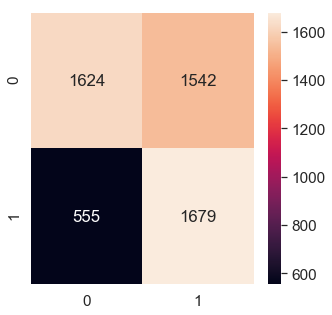

In [150]:
# Plotting Confusion Matrix

df_cm =pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)  # font of all the digits
sns.heatmap(df_cm, annot=True, fmt='g') #'fmt=g' makes sure 1.6e*10^2 is displayed as 160
print("Test data accuracy: %.4f" %accuracy_score(y_test,y_predict))

Test data accuracy: 0.6117


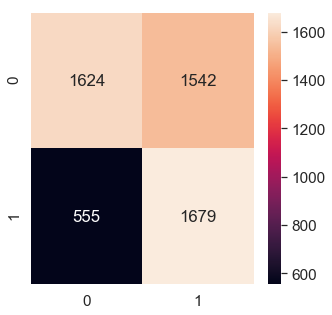

In [151]:
#short way
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g')
print("Test data accuracy: {:.4f}".format(accuracy_score(y_test,y_predict)))

    1542 is a big number for a false positive which is bringing our precision score down.
    Where as we are predicting 555 wrong predictions but on the other side 1679 are false negatives which is maintaining the accuracy of our model, as our model is predicting this part quite accurately.

=====================================================================================================================

## K-Fold Cross Validation

=====================================================================================================================

Cross Validation is a technique, K-fold is one of the methods to perform it. Another is Leave One Out Cross Validation (LOOCV), which is usually performed on small datasets.

### K-Folds Cross Validation
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

### Leave One Out Cross Validation (LOOCV)
This is another method for cross validation, Leave One Out Cross Validation (by the way, these methods are not the only two, there are a bunch of other methods for cross validation. Check them out in the Sklearn website). In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. If the dataset is big, it would most likely be better to use a different method, like kfold.

    So, what method should we use? How many folds? Well, the more folds we have, we will be reducing the error due the bias but increasing the error due to variance; the computational price would go up too, obviously — the more folds you have, the longer it would take to compute it and you would need more memory. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It’s would also computationally cheaper. Therefore, in big datasets, k=3 is usually advised. In smaller datasets, as I’ve mentioned before, it’s best to use LOOCV.


In [173]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10) # cv= number of folds

# We need to input what kind of model we are testing on cross validation, so we input classifier which is nothing but instance
# of our logistic regression
# cross_val_score runs k-fold cross validation

In [174]:
accuracies

array([0.62751678, 0.66163311, 0.64876957, 0.64765101, 0.64597315,
       0.65044743, 0.63478747, 0.65604027, 0.63646532, 0.65548098])

In [175]:
accuracies.mean()

0.6464765100671142

In [158]:
# It means 60% accuracy that we got is very consistent accross all folds of our data set

# Now we need to check which particular field is more important in predicting the response variable

In [172]:
# Analyzing coefficients
pd.concat([pd.DataFrame(X_train.columns, columns=['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])], axis=1) # axis=1 tells these two df's have to be 
    #concatenated column to column
    
#X_train.columns is a kind of list that has all the values of the columns
# when it is converted into a dataframe, it is converted as a column which has all the column names of X_train lines up in
# a single column. And we are naming that column as 'features'.
    
#classifier.coeff_ is a row basically all the betas, to make it a column, we take its transpose. And then converting it into a
# df and concatenating two dataframes. So now after concatenating we can simply see which column has what value as per our model

# Basically we are seeing theta or betas for each of the feature

#concatenate is used as pd.concat in pd and np.concatenate in numpy
# also used as np.c_

,features,coef
0,age,-0.208895
1,deposits,0.588862
2,withdrawal,0.038564
3,purchases_partners,-0.769626
4,purchases,-0.697818
5,cc_taken,0.068218
6,cc_recommended,0.039696
7,cc_disliked,-0.037039
8,cc_liked,0.007413
9,cc_application_begin,0.061367


##### Most of the coefficients are pretty small, but few of them are relatively high

=====================================================================================================================

## FEATURE SELECTION

=====================================================================================================================

What it is going to do, is get the same amount of accuracy that we got earlier, but with fewer columns. It makes the model run faster and we always want to make sure that whenever model goes out in production, it is not too heavy to run.



In [181]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Model to test

classifier =LogisticRegression() #what kind of model we are testing
rfe=RFE(classifier, 20) # Model and how many features we want in the end model
rfe=rfe.fit(X_train,y_train) #Finally fitting train data into this model 


In [180]:
X_train.shape
# We are having a total of 41 columns, how about we shorten it to 20 columns

(17880, 41)

In [184]:
#Summarize the selection of attributes
print(rfe.support_) # Tells which columns are useful

# True's are the ones here that are being used in the final model

[ True  True  True  True  True  True  True False False  True False  True
  True False  True  True  True  True  True  True  True  True False False
 False  True False False  True False False False False False False False
 False False False False False]


In [186]:
X_train.columns[rfe.support_]
# Basically these are the features that our final model is using

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'ios_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'payment_type_Bi-Weekly',
       'payment_type_Weekly'],
      dtype='object')

In [196]:
# Let's get the ranking of these features
rfe.ranking_

# so here all the 1's are included in the model. Number 2 is not included in the model, but it is the 21st feature we would have
# in our model in the order of preference and so on. 

array([ 1,  1,  1,  1,  1,  1,  1,  3, 16,  1, 13,  1,  1, 18,  1,  1,  1,
        1,  1,  1,  1,  1, 20, 11,  2,  1, 17,  8,  1, 10, 15, 14,  6,  9,
       12,  7,  4, 19, 22, 21,  5])

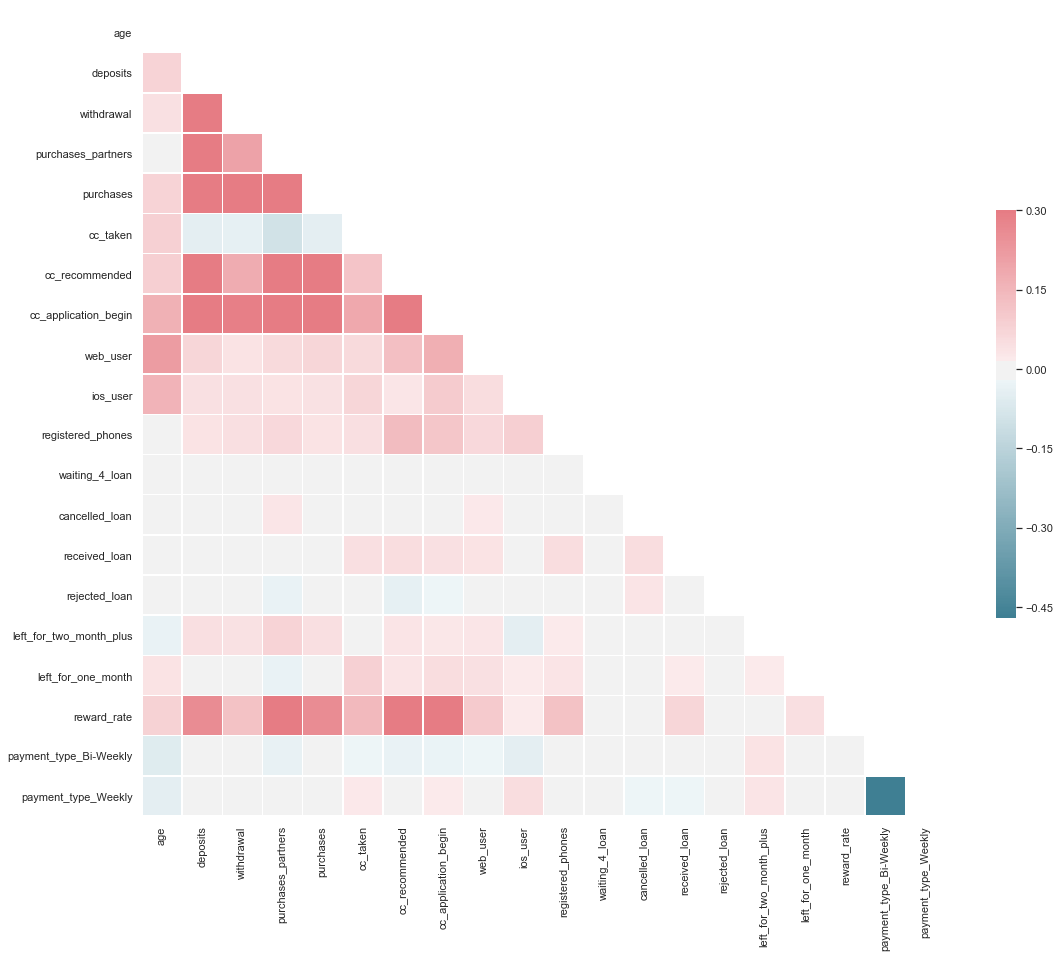

In [197]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    


 ### Now let's fit the model using these columns only

In [194]:
# Building classification model using Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [198]:
#Predicting Test set
y_pred=classifier.predict(X_test[X_test.columns[rfe.support_]])


In [201]:
#Evaluating the results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))



0.6075925925925926
0.5176868655798216
0.7533572068039391
0.6136736554238833


### Accuracy is decent, but precision is still low. But results are pretty similar as we had before. Doing this we got the fields where most of the weight was lying, whih have the maximum predicting power. Chopping off other features do not alter our results, so we we found the most meaningful features to predict if a user is going to churn or not.

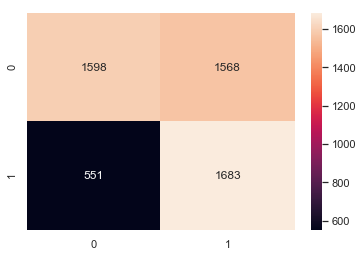

In [202]:
sns.heatmap(cm,annot=True,fmt='g')

==================================================================================================================

## MODEL CONCLUSION

==================================================================================================================

In [204]:
# Analyzing coefficients
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])], axis=1) 

# Classifier is already trained on 20 features, but we need to subset X_train to the columns, that were used in model building

,features,coef
0,age,-0.211673
1,deposits,0.584196
2,withdrawal,0.040435
3,purchases_partners,-0.765119
4,purchases,-0.691532
5,cc_taken,0.064169
6,cc_recommended,0.045722
7,cc_application_begin,0.061010
8,web_user,0.154333
9,ios_user,0.077532



    Purchases seems to be the feature with the highest impact. Deposits, purchase_partners, age, reward_rate also contribute a lot to our model. We have got rid of 20 columns that have very low coefficients a.k.a. very low inportance

In [205]:
# Formatting final results

final_results=pd.concat([y_test, user_identifier], axis=1).dropna()

In [207]:
# It tells us which user churned in real
final_results

,churn,user
4,1.0,61353
7,0.0,67679
8,0.0,21269
18,0.0,69531
22,0.0,25997
31,0.0,28827
36,1.0,58305
45,0.0,2351
48,0.0,11790
64,0.0,46727


In [208]:
final_results['predicted_churn']=y_pred # Adding prediction to the dataframe
final_results=final_results[['user','churn','predicted_churn']] # Simply reordering the columns
final_results.head()

,user,churn,predicted_churn
4,61353,1.0,1
7,67679,0.0,0
8,21269,0.0,0
18,69531,0.0,1
22,25997,0.0,0


In [209]:
# We do not need the index anymore, we are having user as an identifier here
final_results.reset_index(drop=True)

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0


=====================================

# CONLCUSION

We built a Machine Leraning model, with a 61% accuracy which is useful is telling us which user may churn.
We have purposefully left the date of expected churn open-ended because we are focused only on gauging the features that indicate disengagement with the product, and not the exact manner (timeframe) in which users will disengage. we have chosen this open-ended emphasis get a sense of those who are even just a bit likely to churn because we are not aiming to create new products for people who are going to leave us for sure, but for people who are starting to lose interest in the app.

If, after creating new product features, we start seeing our model that less of our users are going to churn , then we can assume our customers are feeling more engaged with what we are offering them. We can move forward with these efforts by inquiring opinions of our users about new features (e.g. polls). If we want to transition into predicting churn more accurately. In order to put emphasis on strictly on those leaving us, we can add a time dimension to churn in our response variable, which would add more accuracy to our model. 

But if we initially had added time frame to our model, the features that caused user churn after that time period would not have been identified. Because users who churn post time limit would be labelled as not churned

The new model would give us who's strictly leaving us in a given timeframe rather than those who show some symptoms of losing interest in the product.

In [ ]:

#### Importing Libraries ####


## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

# One-Hot Encoding
dataset.housing.value_counts()
dataset.groupby('housing')['churn'].nunique().reset_index()
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)


#### Feature Selection ####


## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Model to Test
classifier = LogisticRegression()
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

# New Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)


#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)


